In [1]:
import os
import random
import glob
import shutil
import itertools
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Global variables
numberOfTrainingImages = 3000
numberOfValidationImages = 600
numberOfTestImages = 30
imageWidth = imageHeight = 224
imageLabels = ["thumbsUp", "thumbsDown", "noHand"]

In [3]:
# Organize images into trainingImages, validationImages, testImages directories
os.chdir('images')
if os.path.isdir('trainingImages/thumbsUp') is False:
    # Make trainingImages directory
    os.makedirs('trainingImages/thumbsUp')
    os.makedirs('trainingImages/thumbsDown')
    os.makedirs('trainingImages/noHand')

    # Make validationImages directory
    os.makedirs('validationImages/thumbsUp')
    os.makedirs('validationImages/thumbsDown')
    os.makedirs('validationImages/noHand')

    # Make testImages directory
    os.makedirs('testImages/thumbsUp')
    os.makedirs('testImages/thumbsDown')
    os.makedirs('testImages/noHand')

    # Transfer trainingImages to directory
    for c in random.sample(glob.glob('thumbsUp*'), int(numberOfTrainingImages/len(imageLabels))):
        shutil.move(c, 'trainingImages/thumbsUp')
    for c in random.sample(glob.glob('thumbsDown*'), int(numberOfTrainingImages/len(imageLabels))):
        shutil.move(c, 'trainingImages/thumbsDown')
    for c in random.sample(glob.glob('noHand*'), int(numberOfTrainingImages/len(imageLabels))):
        shutil.move(c, 'trainingImages/noHand')

    # Transfer validationImages to directory
    for c in random.sample(glob.glob('thumbsUp*'), int(numberOfValidationImages/len(imageLabels))):
        shutil.move(c, 'validationImages/thumbsUp')
    for c in random.sample(glob.glob('thumbsDown*'), int(numberOfValidationImages/len(imageLabels))):
        shutil.move(c, 'validationImages/thumbsDown')
    for c in random.sample(glob.glob('noHand*'), int(numberOfValidationImages/len(imageLabels))):
        shutil.move(c, 'validationImages/noHand')

    # Transfer testImages to directory
    for c in random.sample(glob.glob('thumbsUp*'), int(numberOfTestImages/len(imageLabels))):
        shutil.move(c, 'testImages/thumbsUp')
    for c in random.sample(glob.glob('thumbsDown*'), int(numberOfTestImages/len(imageLabels))):
        shutil.move(c, 'testImages/thumbsDown')
    for c in random.sample(glob.glob('noHand*'), int(numberOfTestImages/len(imageLabels))):
        shutil.move(c, 'testImages/noHand')

os.chdir('../')

In [4]:
trainingPath = 'images/trainingImages'
validationPath = 'images/validationImages'
testPath = 'images/testImages'

# Image preparation
batchSize = 10
trainingBatches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=trainingPath, target_size=(imageWidth, imageHeight),
                         classes=["thumbsUp", "thumbsDown", "noHand"], batch_size=batchSize)

validationBatches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=validationPath, target_size=(imageWidth, imageHeight),
                         classes=["thumbsUp", "thumbsDown", "noHand"], batch_size=batchSize)

testBatches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=testPath, target_size=(imageWidth, imageHeight),
                         classes=["thumbsUp", "thumbsDown", "noHand"], batch_size=batchSize, shuffle=False)

Found 3000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [5]:
assert trainingBatches.n == numberOfTrainingImages
assert validationBatches.n == numberOfValidationImages
assert testBatches.n == numberOfTestImages
assert trainingBatches.num_classes == validationBatches.num_classes == testBatches.num_classes == len(imageLabels)

In [6]:
images, labels = next(trainingBatches)

In [8]:
unitsLength = len(imageLabels)
myNeuralNetwork = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(imageWidth, imageHeight, 3)),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(units=unitsLength, activation='softmax'), ])

In [9]:
myNeuralNetwork.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 602115    
Total params: 621,507
Trainable params: 621,507
Non-trainable params: 0
________________________________________________

In [10]:
myNeuralNetwork.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [11]:
myNeuralNetwork.fit(x=trainingBatches,
                    steps_per_epoch=len(trainingBatches),
                    validation_data=validationBatches,
                    validation_steps=len(validationBatches),
                    epochs=10,
                    verbose=2)

Epoch 1/10
300/300 - 262s - loss: 6.0836 - acc: 0.8517 - val_loss: 1.3873 - val_acc: 0.9217
Epoch 2/10
300/300 - 279s - loss: 0.1072 - acc: 0.9877 - val_loss: 0.0793 - val_acc: 0.9917
Epoch 3/10
300/300 - 247s - loss: 0.1446 - acc: 0.9857 - val_loss: 0.0041 - val_acc: 0.9983
Epoch 4/10
300/300 - 244s - loss: 0.0061 - acc: 0.9983 - val_loss: 0.0594 - val_acc: 0.9917
Epoch 5/10
300/300 - 266s - loss: 0.0579 - acc: 0.9920 - val_loss: 0.5065 - val_acc: 0.9483
Epoch 6/10
300/300 - 260s - loss: 0.0254 - acc: 0.9953 - val_loss: 0.0318 - val_acc: 0.9933
Epoch 7/10
300/300 - 240s - loss: 0.0020 - acc: 0.9993 - val_loss: 1.6207e-04 - val_acc: 1.0000
Epoch 8/10
300/300 - 236s - loss: 2.6562e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 9/10
300/300 - 232s - loss: 6.9587e-06 - acc: 1.0000 - val_loss: 6.5264e-04 - val_acc: 1.0000
Epoch 10/10
300/300 - 242s - loss: 1.6522e-07 - acc: 1.0000 - val_loss: 6.5943e-04 - val_acc: 1.0000


In [12]:
predictions = myNeuralNetwork.predict(x=testBatches, steps=len(testBatches), verbose=0)

In [13]:
myConfusionMatrix = confusion_matrix(y_true=testBatches.classes, y_pred=np.argmax(predictions, axis=-1))

In [14]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


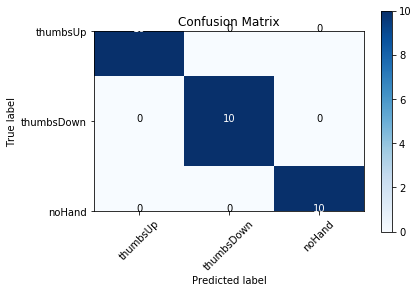

In [15]:
plot_confusion_matrix(cm=myConfusionMatrix, classes=imageLabels, title='Confusion Matrix')

In [16]:
if os.path.isdir('TrainedNeuralNetworks') is False:
    os.makedirs('TrainedNeuralNetworks')

myNeuralNetwork.save('TrainedNeuralNetworks/HandGestureRecognition_UpDownNone_v3.h5')